In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.float_format', lambda x: '%.2f' % x)

Analisis descriptivo

In [112]:
categorical = [
    "Car", "Car_desc", "Jur", "Jur_desc", "Sjur", "Sjur_desc", "Ent", "Ent_desc", "Og", "Og_desc", "UE", "UE_desc", "Prog", "Prog_desc", "Sprog", "Sprog_desc", "Proy", "Proy_desc", "Actividad", "Act_desc", "Ob", "ob_desc", "Fin", "Fin_desc", "Fun", "Fun_desc", "Inc", "Inc_desc", "Ppal", "Ppal_desc", "Par", "Par_desc", "Spar", "Spar_desc", "Eco", "Eco_desc", "Fte", "Fte_desc", "Geo", "Geo_desc",
]

categoricalIds = list(
    filter(lambda text: not text.endswith("_desc"), categorical))
categoricalDesc = list(
    filter(lambda text: text.endswith("_desc"), categorical))

nonCategorical = [
    "Sanción", "Vigente", "Definitivo", "Devengado"
]

types = {var: "category" for var in categorical}

data = pd.read_csv("dataset.csv", dtype=types)

In [35]:
null_data = data[data.isnull().any(axis=1)]
null_data
# no hay datos faltantes, testeado para strings y números en blanco, es decir "foo,,bar" en el csv

,Car,Car_desc,Jur,Jur_desc,Sjur,Sjur_desc,Ent,Ent_desc,Og,Og_desc,...,Eco,Eco_desc,Fte,Fte_desc,Geo,Geo_desc,Sanción,Vigente,Definitivo,Devengado


In [114]:
# Generar tablitas de cuantas descripciones tiene un id, sin tener en cuenta si está dentro de una
# jerarquía diferente
variables = zip(categoricalIds, categoricalDesc)
for (var, desc) in variables:
    counts = data[[var, desc]].drop_duplicates().groupby(var).size().reset_index()
    filtered = counts[counts[0] > 1]
    if not filtered.empty:
        # todo: make this crossplatform (?)
        # filtered.to_csv("tablas/"+var+".csv", index=False, header=False)
        print(filtered)

  Sjur   0
0    0  22
  Ent   0
0   0  28
    Prog   0
0      1  18
1     10   6
2     11  10
3     12   6
4     14   7
..   ...  ..
95    63   5
97    91   3
98   100   2
99   102   2
107   88   2

[99 rows x 2 columns]
   Sprog    0
0      0  504
1      1    2
12     2    3
23     3    2
34     4    2
39     5    2
   Proy    0
0     0  543
1     1   75
2     2   27
3     3   17
4     4   11
5     5    4
6    52    2
9     6    3
10   60   12
11   61   12
12   62    7
13   68    2
14   69    2
15    7    2
18   72    2
20    8    2
21    9    2
24   10    2
25   11    2
26   17    2
29   63    2
30   65   33
31   66    4
42   51    2
    Actividad    0
0           0  231
1        1000   33
2       10000  339
3       10101   64
4       10102   43
..        ...  ...
166     10143    2
180     11131    2
182     11143    2
197     16101    3
201      2104    2

[101 rows x 2 columns]
    Ob     0
0    0  1426
1   51   141
2   52    47
3   53    43
4   54    30
5   55    24
6   56    34


In [119]:
# función que chequea si subvar y subvardesc son consistentes adentro de la jerarquía de "supervar"
# es decir, chequea si hay id's repetidos pero con distinta descripción pero mirando solo localmente
# para cada grupo de "supervar" (a diferencia de las tablas generadas arriba)
# obviamente no prueba que sea una subcategoría (cualquier variable globalmente consistente da true)
# solamente sirve para descartar la posibilidad de inconsistencias tras analizar la tabla de arriba
# es decir, si un id tiene más de una definición mirado globalmente, pero subcategorizándolo tiene una única 
# entonces está todo ok y es una subcategoría (pero no necesariamente es la mínima supercategoría)
def check_consistency_under_category(subvar, subvardesc, supervar):
    triplets = data[[subvar, subvardesc, supervar]].drop_duplicates()
    result = True
    # para cada grupo de la supercategoría(j), 
    # chequear si hay la misma cantidad de id's diferentes y descripciones diferentes
    for j in triplets[supervar].unique():
        df = triplets[triplets[supervar] == j]
        equals = df[subvar].unique().size == df[subvardesc].unique().size
        result = result and equals
    return result


In [116]:
check_consistency_under_category("Sjur", "Sjur_desc", "Jur")

True

In [120]:
check_consistency_under_category("Ppal", "Ppal_desc", "Inc")

True

In [8]:
data[categoricalIds].describe()

,Car,Jur,Sjur,Ent,Og,UE,Prog,Sprog,Proy,Actividad,Ob,Fin,Fun,Inc,Ppal,Par,Spar,Eco,Fte,Geo
count,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801
unique,2,22,8,32,59,345,108,44,46,211,50,5,9,7,9,9,129,27,7,16
top,1,55,0,0,55,561,1,0,0,1000,0,3,2,1,1,1,0,21200000,11,1
freq,40450,7636,42638,40886,7636,3825,2655,43864,46609,10932,46722,23214,10891,16859,10524,12451,47451,16859,42906,18187


In [9]:
pd.crosstab(data["Jur"], data["Sjur"])

Sjur,0,21,22,24,26,27,29,35
Jur,,,,,,,,
1,75,0,0,0,0,0,0,0
2,63,0,0,0,0,0,0,0
20,437,1348,935,441,0,813,450,0
21,4727,0,0,0,0,0,0,0
26,2622,0,0,0,1880,0,0,0
28,1363,0,0,0,0,0,0,0
3,194,0,0,0,0,0,0,0
30,2906,0,0,0,0,0,0,0
35,4861,0,0,0,0,0,0,296


In [227]:
data[nonCategorical].describe()

,Sanción,Vigente,Definitivo,Devengado
count,48801.00,48801.00,48801.00,48801.00
mean,4565606.60,4660883.41,2406347.50,2081568.95
std,43003433.61,54857115.92,46065419.98,45597285.78
min,0.00,0.00,0.00,0.00
25%,0.00,7600.00,0.00,0.00
50%,41000.00,84816.00,9170.00,6179.34
75%,550000.00,845000.00,273456.40,222314.36
max,4008702080.00,7952610958.00,7952610957.70,7952610957.70


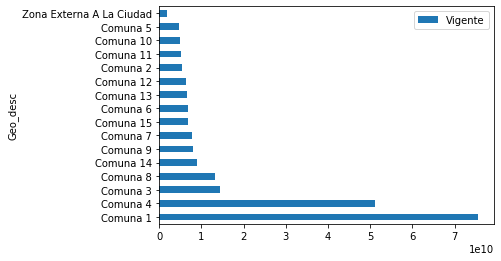

In [224]:
# Análisis bivariado categorica - numérica
x = 'Geo_desc'
y = 'Vigente'
data[[x, y]].groupby(x).sum().sort_values(y, ascending=False).plot.barh()
plt.savefig("Geo_desc-Vigente.png", bbox_inches='tight')
# Total Vigente por Geo_desc

In [79]:
# take two variables and make a dispersion plot with a linear fit on top
def dispersion_graph(x, y, limit_quantile = 1.0, save_img = False):
    data[nonCategorical].plot.scatter(x, y)
    plt.xlim(0, data[x].quantile(limit_quantile))
    plt.ylim(0, data[y].quantile(limit_quantile))
    t = np.arange(0., float(data[x].max()), 1000)
    (a, b) = np.polyfit(data[x], data[y], 1)
    plt.plot(t, (t * a) + b, color="red", label="linear fit")
    if save_img:
        plt.savefig(x+y+"dispersion_graph.png")
    plt.show()

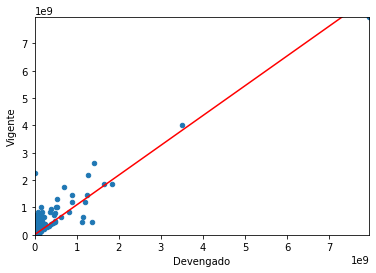

In [183]:
dispersion_graph("Devengado", "Vigente", save_img = True, limit_quantile = 1.00) # correlation: 0.71 (low)
# comentario: me da la impresión de que la correlación es baja porque hay muchos puntos donde uno vale 0
# y el otro no.
# Principalmente porque parece bastante lineal en grandes lineas. Podríamos intentar filtrar esos datos
# el último valor es alto outlier igual
# Nótese que está limitado al cuantil 0.99 para ignorar un poco los últimos outliers

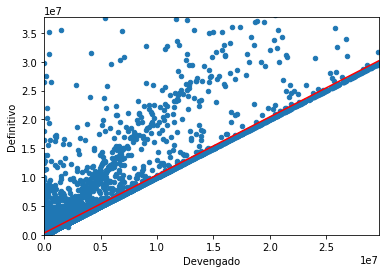

In [178]:
dispersion_graph("Devengado", "Definitivo", save_img = True, limit_quantile=0.99) # correlation: 1.0 (high)
# me choca demasiado el hecho de que abajo no haya nada
# supongo que implica que el definitivo siempre es >= devengado 
# (quizás podríamos calcular la desviación estándar de esas diferencias, como para saber cuánto mayor)
# además de eso, parecen ser relativamente lineales.
# Nótese que está limitado al cuantil 0.99 para ignorar un poco los últimos outliers

In [12]:
data[nonCategorical].corr()

,Sanción,Vigente,Definitivo,Devengado
Sanción,1.00,0.71,0.50,0.49
Vigente,0.71,1.00,0.91,0.91
Definitivo,0.50,0.91,1.00,1.00
Devengado,0.49,0.91,1.00,1.00


In [14]:
data[categoricalDesc].describe().loc[["unique", "count"]]

,Car_desc,Jur_desc,Sjur_desc,Ent_desc,Og_desc,UE_desc,Prog_desc,Sprog_desc,Proy_desc,Act_desc,ob_desc,Fin_desc,Fun_desc,Inc_desc,Ppal_desc,Par_desc,Spar_desc,Eco_desc,Fte_desc,Geo_desc
unique,2,22,29,59,59,343,510,553,791,1652,2111,5,20,7,48,171,352,22,7,16
count,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801,48801


Tabla de frecuencias. 

In [38]:
for category_name in categoricalDesc:
    print(pd.value_counts(data[category_name]))
    data[category_name].count()
    print('-------------------------------------------------------------------------------------')


Administracion Central         40450
Organismos Descentralizados     8351
Name: Car_desc, dtype: int64
-------------------------------------------------------------------------------------
Ministerio De Educacion                             7636
Ministerio De Salud                                 6015
Ministerio De Ambiente Y Espacio Publico            5157
Jefatura De Gabinete De Ministros                   4727
Ministerio De Justicia Y Seguridad                  4502
Jefatura De Gobierno                                4424
Ministerio De Desarrollo Urbano Y Transporte        2906
Ministerio De Hacienda                              2793
Min.Hàbitat Y Des. Humano                           2726
Ministerio De Cultura                               2370
Min.Modern.Innovacion Y Tecnologia                  1791
Ministerio De Gobierno                              1363
Ministerio Publico                                   644
Procuracion General  De La Ciudad                    373
Consejo De La

Porcentaje datos faltantes

In [3]:
#for category_name in categorical:
for category_name in categoricalIds:
    print(data.loc[data[category_name].isnull(), category_name].count())
#print(data.loc[data['Definitivo'] == 0, 'Definitivo'].count())
print('-----------------')
for category_name in nonCategorical:
    print(data.loc[data[category_name]==0, category_name].count())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-----------------
12790
4081
17943
19105
